In [1]:
import torch
%load_ext autoreload
%autoreload 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import src.models.resnet_encoder as encoder
import src.models.resnet_decoder as decoder
from torchinfo import summary

In [3]:
enc_net = encoder.ResNet(encoder.Bottleneck, [3, 4, 6, 3], in_channel = 1, return_indices=True)
enc_net.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, trac

In [5]:
test_input = torch.rand(2, 1, 224, 224).to(device)
z, indice = enc_net(test_input)

In [6]:
summary(enc_net, input_size=(2, 1, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [2, 2048, 1, 1]           --
├─Conv2d: 1-1                            [2, 64, 112, 112]         3,136
├─BatchNorm2d: 1-2                       [2, 64, 112, 112]         128
├─ReLU: 1-3                              [2, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [2, 64, 56, 56]           --
├─Sequential: 1-5                        [2, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [2, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [2, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [2, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [2, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [2, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [2, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [2, 64, 56, 56]           --
│ 

In [11]:
dec_net = decoder.ResNet(decoder.Bottleneck, [3, 6, 4, 3], out_channel=1).to(device)

In [12]:
summary(dec_net, input_data=(z, indice))

Layer (type:depth-idx)                        Output Shape              Param #
ResNet                                        [2, 1, 224, 224]          --
├─Upsample: 1-1                               [2, 2048, 7, 7]           --
├─Sequential: 1-2                             [2, 1024, 14, 14]         --
│    └─Bottleneck: 2-1                        [2, 2048, 7, 7]           --
│    │    └─ConvTranspose2d: 3-1              [2, 512, 7, 7]            1,048,576
│    │    └─BatchNorm2d: 3-2                  [2, 512, 7, 7]            1,024
│    │    └─ReLU: 3-3                         [2, 512, 7, 7]            --
│    │    └─ConvTranspose2d: 3-4              [2, 512, 7, 7]            2,359,296
│    │    └─BatchNorm2d: 3-5                  [2, 512, 7, 7]            1,024
│    │    └─ReLU: 3-6                         [2, 512, 7, 7]            --
│    │    └─ConvTranspose2d: 3-7              [2, 2048, 7, 7]           1,048,576
│    │    └─BatchNorm2d: 3-8                  [2, 2048, 7, 7]       

In [8]:
from src.utils import CheXpert
import pandas as pd

In [9]:
dataset = CheXpert(data_file=pd.read_csv("../data/chexpert/train.csv"))

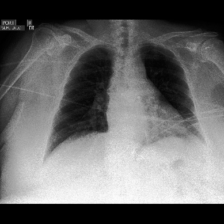

In [10]:
dataset.display(0)